# Data analysis for all data collected during our project
 

#### imports and  loading Data 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dfCounting6 = pd.read_csv("Results6/countingSort-PC6.csv")
dfCounting6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting16 = pd.read_csv("Results16/countingSort-PC16.csv")
dfCounting16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting21 = pd.read_csv("Results21/countingSort-PC21.csv")
dfCounting21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfCounting23 = pd.read_csv("Results23/countingSort-PC23.csv")
dfCounting23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV6 = pd.read_csv("Results6/readCSV-PC6.csv")
dfReadCSV6.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV16 = pd.read_csv("Results16/readCSV-PC16.csv")
dfReadCSV16.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]
# 
dfReadCSV21 = pd.read_csv("Results21/readCSV-PC21.csv")
dfReadCSV21.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

dfReadCSV23 = pd.read_csv("Results23/readCSV-PC23.csv")
dfReadCSV23.columns=["Test name","PKG (J)","CPU (J)","GPU (J)","Memory (J)","Temperature","Time (ms)"]

## Counting sort

In [7]:
def removeNonsense(df):
    df = df[df["PKG (J)"]>=0]
    df = df[df["CPU (J)"]>=0]
    df = df[df["Time (ms)"]>=0]
    return df

#dfC6 = removeNonsense(dfCounting6)
dfC16 = removeNonsense(dfCounting16)
#dfC21 = removeNonsense(dfCounting21)
#dfC23 = removeNonsense(dfCounting23)


#dfR6 = removeNonsense(dfReadCSV6)
dfR16 = removeNonsense(dfReadCSV16)
# dfR21 = removeNonsense(dfReadCSV21)
# dfR23 = removeNonsense(dfReadCSV23)


In [8]:
def makeinputColumn(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[0])

    df["Input case"] = l

#makeinputColumn(dfC6)
makeinputColumn(dfC16)
# makeinputColumn(dfC21)
# makeinputColumn(dfC23)
print(dfC16)

def makeinputColumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i]["Test name"].split("-")[1].lower())
    df["Input case"] = l
    
#makeinputColumn_readCSV(dfR6)
makeinputColumn_readCSV(dfR16)
# makeinputColumn_readCSV(dfR21)
# makeinputColumn_readCSV(dfR23)


             Test name    PKG (J)   CPU (J) GPU (J)  Memory (J)  Temperature  \
0      random1-25000-1   5.558350  4.756775            0.380188           72   
1      random1-25000-1   5.314636  4.515320            0.365112           72   
2      random1-25000-1   5.447754  4.662659            0.370605           72   
3      random1-25000-1   5.188416  4.428955            0.356323           72   
4      random1-25000-1   5.204102  4.443542            0.355286           72   
...                ...        ...       ...     ...         ...          ...   
20794  worst-1000000-1  10.212769  8.609131            0.739380           60   
20795  worst-1000000-1  10.300110  8.668518            0.757263           60   
20796  worst-1000000-1  10.474915  8.800232            0.767151           61   
20797  worst-1000000-1  10.169312  8.535522            0.756592           60   
20798  worst-1000000-1  10.342163  8.699158            0.762634           60   

       Time (ms) Input case  
0        

In [9]:
def makeSizecolumn(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[1]))

    df["Size"] = l
#makeSizecolumn(dfC6)
makeSizecolumn(dfC16)
# makeSizecolumn(dfC21)
# makeSizecolumn(dfC23)

def makeSizecolumn_readCSV(df):
    l = []
    for i in range(len(df)):
        l.append(int(df.iloc[i]["Test name"].split("-")[-1]))

    df["Size"] = l

# makeSizecolumn_readCSV(dfR6)
makeSizecolumn_readCSV(dfR16)
# makeSizecolumn_readCSV(dfR21)
# makeSizecolumn_readCSV(dfR23)

In [10]:
# print(f"C6: {len(dfC6)}")
print(f"C16: {len(dfC16)}")
# print(f"C21: {len(dfC21)}")
# print(f"C23: {len(dfC23)}")
# # print(f"R6: {len(dfR6)}")
print(f"R16: {len(dfR16)}")
# print(f"R21: {len(dfR21)}")
# print(f"R23: {len(dfR23)}")

C16: 20799
R16: 41599


### remove outliers

In [11]:
def remove_outliers(df, type, size, col):
    q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
    q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
    IQR = q3 - q1 
    LF = q1 - 1.5* IQR
    UF = q3 + 1.5* IQR
    # print(col)
    # print(df[df["Input case"] == type][df["Size"]==size][df[col]>UF])
    # print(df[df["Input case"] == type][df["Size"]==size][df[col]<LF])
    #print(f"For size, case: {size},{type}. Lower fence: {LF} Upper fence: {UF}.")
    df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]
    df = df[df["Input case"] == type][df["Size"]==size][df[col] >= LF]
    return df

In [12]:
def remove_outliers_for_pc(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    col = ["CPU (J)", "Memory (J)", "Temperature","Time (ms)", "PKG (J)"]
    for case in c:
        for size in s:
            for column in col:
                df = remove_outliers(df, case, size, column)
remove_outliers_for_pc(dfR16)
remove_outliers_for_pc(dfC16)
# remove_outliers_for_pc(dfC6)
# remove_outliers_for_pc(dfC21)
# remove_outliers_for_pc(dfC23)
# remove_outliers_for_pc(dfR6)
# remove_outliers_for_pc(dfR21)
# remove_outliers_for_pc(dfR23)

C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\388745506.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.25)
C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\388745506.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3 = df[df["Input case"] == type][df["Size"]==size][col].quantile(q=0.75)
C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\388745506.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[df["Input case"] == type][df["Size"]==size][df[col] <= UF]


In [13]:
# print(f"C6: {len(dfC6)}")
# print(f"C16: {len(dfC16)}")
# print(f"C21: {len(dfC21)}")
# print(f"C23: {len(dfC23)}")
# print(f"R6: {len(dfR6)}")
# print(f"R16: {len(dfR16)}")
# print(f"R21: {len(dfR21)}")
# print(f"R23: {len(dfR23)}")

In [14]:
def meanData(df,type,size):
    meandf = df[df["Input case"] == type][df["Size"]==size].mean()
    meandf["Input case"] = type
    return meandf

def mean_of_dataset(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = ["best", "worst", "random1","random2","random3","random4","random5","random6","random7","random8","random9","random10",]
    l = []
    for case in c:
        for size in s:
            l.append(meanData(df, case, size))   
    
    dfMeans = pd.concat([series.to_frame().T for series in l], ignore_index=True)
    return dfMeans

meanC16 = mean_of_dataset(dfC16)
# meanC6 = mean_of_dataset(dfC6)
# meanC21 = mean_of_dataset(dfC21)
# meanC23 = mean_of_dataset(dfC23)



C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\4219130073.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\4219130073.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\4219130073.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\4219130073.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

In [15]:
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case
0,1.801569,1.546815,0.109088,62.5625,198.324735,25000.0,best
1,2.260466,1.950822,0.135607,65.9225,237.105328,50000.0,best
2,2.671434,2.312341,0.160467,68.0175,271.896525,75000.0,best
3,3.039543,2.636188,0.180906,69.21,302.5496,100000.0,best
4,4.053275,3.516155,0.234125,70.895,392.455793,200000.0,best
...,...,...,...,...,...,...,...
151,8.256359,6.958998,0.607999,63.0625,1039.849288,600000.0,random10
152,9.323107,7.867594,0.70032,62.6,1157.338375,700000.0,random10
153,9.716029,8.188065,0.731836,62.125,1221.490875,800000.0,random10
154,9.527628,8.000801,0.708826,61.575,1237.641625,900000.0,random10


In [16]:

def list_of_case(df):
    l = []
    for i in range(len(df)):
        if df["Input case"].iloc[i] not in l:
            l.append(df["Input case"].iloc[i])
    return l


def mean_of_dataset_readCSV(df):
    s = [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]
    c = list_of_case(df)
    l = []
    for case in range(len(c)):
        for size in range(len(s)):
            l.append(meanData(df, c[case], s[size]))  

    dfMeans = pd.concat([series.to_frame().T  for series in l], ignore_index=True)
    return dfMeans


meanR16 = mean_of_dataset_readCSV(dfR16)
# meanR6 = mean_of_dataset_readCSV(dfR6)
# meanR21 = mean_of_dataset_readCSV(dfR21)
# meanR23 = mean_of_dataset_readCSV(dfR23)

C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\4219130073.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\4219130073.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\4219130073.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meandf = df[df["Input case"] == type][df["Size"]==size].mean()
C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\4219130073.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only v

In [17]:
# meanC6 = meanC6.reset_index(drop=True)
# meanC21 = meanC21.reset_index(drop=True)
# meanC23 = meanC23.reset_index(drop=True)
# meanR6 = meanR6.reset_index(drop=True)
# meanR21 = meanR21.reset_index(drop=True)
# meanR23 = meanR23.reset_index(drop=True)
meanC16 = meanC16.reset_index(drop=True)
meanR16 = meanR16.reset_index(drop=True)
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case
0,1.801569,1.546815,0.109088,62.5625,198.324735,25000.0,best
1,2.260466,1.950822,0.135607,65.9225,237.105328,50000.0,best
2,2.671434,2.312341,0.160467,68.0175,271.896525,75000.0,best
3,3.039543,2.636188,0.180906,69.21,302.5496,100000.0,best
4,4.053275,3.516155,0.234125,70.895,392.455793,200000.0,best
...,...,...,...,...,...,...,...
151,8.256359,6.958998,0.607999,63.0625,1039.849288,600000.0,random10
152,9.323107,7.867594,0.70032,62.6,1157.338375,700000.0,random10
153,9.716029,8.188065,0.731836,62.125,1221.490875,800000.0,random10
154,9.527628,8.000801,0.708826,61.575,1237.641625,900000.0,random10


In [18]:
def makeCPU_sub_readCSV(meanC, meanR):
    lc = []
    lt = []
    lm = []

    for i in range(len(meanC["Size"])):
        case = meanC["Input case"][i]
        size = meanC["Size"][i]
        if case == "best":
                case2 = "countingbest"
        if case == "worst":
            case2 = "countingworst"
        if case.startswith("random"):
            case2 = "countingrandom"+case.split("m")[-1]

        Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
        Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
        lc.append(Cc-Rc)

        Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
        Rt = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Time (ms)"].index.tolist()[0]]
        lt.append(Ct-Rt)

        Cm = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Memory (J)"].index.tolist()[0]]
        Rm = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["Memory (J)"].index.tolist()[0]]
        lm.append(Cm-Rm)

    meanC["CPU - readCSV"] = lc
    meanC["Time - readCSV"] = lt
    meanC["Memory - readCSV"] = lm


makeCPU_sub_readCSV(meanC16, meanR16)
# makeCPU_sub_readCSV(meanC6, meanR6)
# makeCPU_sub_readCSV(meanC21, meanR21)
# makeCPU_sub_readCSV(meanC23, meanR23)



C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\2325396409.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Cc = meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\2325396409.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Rc = meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"][meanR[meanR["Input case"] == case2][meanR["Size"]==size]["CPU (J)"].index.tolist()[0]]
C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\2325396409.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Ct = meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"][meanC[meanC["Input case"] == case][meanC["Size"]==size]["Time (ms)"].index.tolist()[0]]
C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\2325396409.py:21: UserWarning: B

In [19]:
print(meanC16[meanC16["Temperature"]<60])
# print(meanC6[meanC6["Temperature"]<60])
# print(meanC21[meanC21["Temperature"]<60])
# print(meanC23[meanC23["Temperature"]<60])

      PKG (J)   CPU (J) Memory (J) Temperature    Time (ms)       Size  \
13   5.021475  4.305814   0.365951       52.39   621.881435    25000.0   
14    5.73528  4.923645    0.41671     58.7475   671.032192    50000.0   
22   8.726017  7.360803   0.647093       59.38   1125.09395   700000.0   
23   9.068158  7.641362   0.673089     59.3025  1182.284825   800000.0   
24  10.067276  8.494973   0.763147      59.705  1272.292925   900000.0   
25   10.29177   8.64845   0.757239     59.2125  1351.388075  1000000.0   

   Input case  CPU - readCSV  Time - readCSV  Memory - readCSV  
13      worst       2.466338      397.938633          0.242570  
14      worst       2.680597      409.878315          0.265688  
22      worst       1.725031      472.490550          0.300446  
23      worst       1.646657      463.767795          0.315169  
24      worst       1.917489      468.118417          0.381125  
25      worst       1.720591      510.203890          0.346798  


# PLOTS

In [20]:
def plotdf(X, Y, df, case, color):
    for i in range(len(df)):
        if df["Input case"][i].startswith(case):
            plt.plot( df[X][i],df[Y][i],"o", color = color)

In [21]:
def plotdfs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(10,7))

    for df, color in zip(dfs, colors):
        plotdf(X, Y, df, case, color)

    plt.title(title + f" for {case} case")
    for color, pc in zip(colors, ["PC16","PC21","PC23","PC6"]):
        plt.plot(0,0,"", color = color, label = pc)
    plt.legend(loc="upper left")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

In [22]:
listOfDF = [meanC16]
colors = ["red", "green", "blue", "orange"]

In [23]:
def plotRandDFs(X, Y, dfs, case, colors, title):
    plt.figure(figsize=(10,7))
    for i in range(1,11):
        for df, color in zip(dfs, colors):
            plotdf(X, Y, df, case+str(i), color)

    plt.title(title + f" for {case} case")
    for color, pc in zip(colors, ["PC16","PC21","PC23","PC6"]):
        plt.plot(0,0,"", color = color, label = pc)
    plt.legend(loc="upper left")
    plt.xlabel(X)
    plt.ylabel(Y)
    plt.show()

In [24]:
# case = "random"
# x = "Time (ms)"

# plotRandDFs(x, "CPU (J)", listOfDF, case, colors, "time v cpu")
# plotRandDFs(x, "Memory (J)", listOfDF, case, colors, "time v memory")
# plotRandDFs("Memory (J)", "CPU (J)", listOfDF, case, colors, "mem v cpu")


# BEST

In [25]:

# plotdfs("Size", "CPU - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting CPU for each PC")
# plotdfs("Size", "CPU (J)", listOfDF, "best", colors, "raw CPU (J) data from Counting for each PC")


In [26]:
# plotdfs("Size", "Time - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Time for each PC")
# plotdfs("Size", "Time (ms)", listOfDF, "best", colors, "raw Time (ms) data from Counting for each PC")

In [27]:
# plotdfs("Size", "Memory - readCSV", listOfDF, "best", colors, "readCSV subtracted from Counting Memory for each PC")
# plotdfs("Size", "Memory (J)", listOfDF, "best", colors, "raw Memory (J) data from Counting for each PC")

In [28]:
# plotdfs("Size", "Temperature", listOfDF, "best", colors, "Temperature of Counting for each PC")

# WORST

In [29]:
# plotdfs("Size", "CPU - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting CPU for each PC")
# plotdfs("Size", "CPU (J)", listOfDF, "worst", colors, "raw CPU (J) data from Counting for each PC")

In [30]:
# plotdfs("Size", "Time - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Time for each PC")
# plotdfs("Size", "Time (ms)", listOfDF, "worst", colors, "raw Time (ms) data from Counting for each PC")

In [31]:
# plotdfs("Size", "Memory - readCSV", listOfDF, "worst", colors, "readCSV subtracted from Counting Memory for each PC")
# plotdfs("Size", "Memory (J)", listOfDF, "worst", colors, "raw Memory (J) data from Counting for each PC")

In [32]:
# plotdfs("Size", "Temperature", listOfDF, "worst", colors, "Temperature of Counting for each PC")

# RANDOM

In [33]:

# plotRandDFs("Size", "CPU - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting CPU for each PC")
# plotRandDFs("Size", "CPU (J)", listOfDF, "random", colors, "raw CPU (J) data from Counting for each PC")


In [34]:

# plotRandDFs("Size", "Time - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Time for each PC")
# plotRandDFs("Size", "Time (ms)", listOfDF, "random", colors, "raw Time (ms) data from Counting for each PC")


In [35]:

# plotRandDFs("Size", "Memory - readCSV", listOfDF, "random", colors, "readCSV subtracted from Counting Memory for each PC")
# plotRandDFs("Size", "Memory (J)", listOfDF, "random", colors, "raw Memory (J) data from Counting for each PC")


In [36]:

# plotRandDFs("Size", "Temperature", listOfDF, "random", colors, "Temperature of Counting for each PC")


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from operator import itemgetter

def polyReg(SeriesX, SeriesY,dg, Label, color, plotLabel = True, printR2Score = True, plotGraph = True):
    X = SeriesX.values.reshape(SeriesX.size, -1)
    y = SeriesY.values

    fitness = []
   #for dg in range(minDegrees, maxDegrees):
    # Create an empty polynomial function with degree of 4
    poly_reg = PolynomialFeatures(degree=dg)
    
    # Fit the function to the X and transform X to the polynomial format
    X_poly = poly_reg.fit_transform(X)

    # Now we construct a Multiple Linear Regressor on the transformed X_ploy
    lr_2 = LinearRegression()  
    lr_2.fit(X_poly, y)  
    
    # Get the y values using the constructed Multiple Linear Regressor
    y_poly = lr_2.predict(X_poly)
    
    r2 = metrics.r2_score(y,y_poly)
    #if printR2Score:
    #    print(f"r2_score for {Label} {dg} is: {r2}")
    fitness.append((f"poly {dg}dg", r2, y_poly))
    #print(f"Parameters of poly: {poly_reg.get_params()}") #does not give what we are looking for
    
    if plotGraph:
        plt.scatter(X, y, color=color, label=Label)
        if dg==1:
            plt.plot(X, y_poly, color=color,label= f"Linear regression", linewidth=2)
        else:
            plt.plot(X, y_poly, color=color,label= f"{dg}. dg polynomial regression", linewidth=2)
        #plt.legend(loc='upper left')
    #print(lr_2.intercept_, lr_2.coef_)
    return max(fitness,key=itemgetter(1))
        


In [38]:
def getIndex(df,case,size):
    return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]



In [39]:
def calcPercent(df):
    cpuPercent = []
    pkgPercent = []
    fullEC = []
    for case in ["best", "worst", "random"]:
        if case != "random":
            for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                cpuPercent.append(df["CPU - readCSV"][getIndex(df,case,size)] / df["PKG (J)"][getIndex(df,case,size)] * 100)
                pkgPercent.append(100)
                fullEC.append(df["CPU - readCSV"][getIndex(df,case,size)]+df["Memory - readCSV"][getIndex(df,case,size)])
        else :
            for i in range(1,11):
                for size in [25000,50000,75000,100000,200000,300000,400000,500000,600000,700000,800000,900000,1000000]:
                    cpuPercent.append(df["CPU (J)"][getIndex(df,case+str(i),size)] / df["PKG (J)"][getIndex(df,case+str(i),size)] * 100)
                    pkgPercent.append(100)
                    fullEC.append(df["CPU - readCSV"][getIndex(df,case+str(i),size)]+df["Memory - readCSV"][getIndex(df,case+str(i),size)])

    df["CPU % of PKG"] = cpuPercent
    df["PKG %"] = pkgPercent
    df["full EC"] = fullEC

In [40]:
for df in listOfDF:
    calcPercent(df)

C:\Users\mathi\AppData\Local\Temp\ipykernel_86724\279826804.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  return df[df["Input case"] == case][df["Size"]==size].index.tolist()[0]


In [41]:
meanC16

,PKG (J),CPU (J),Memory (J),Temperature,Time (ms),Size,Input case,CPU - readCSV,Time - readCSV,Memory - readCSV,CPU % of PKG,PKG %,full EC
0,1.801569,1.546815,0.109088,62.5625,198.324735,25000.0,best,-0.022315,-4.373005,0.004066,-1.238638,100,-0.018249
1,2.260466,1.950822,0.135607,65.9225,237.105328,50000.0,best,-0.032554,-0.801982,0.005697,-1.440153,100,-0.026858
2,2.671434,2.312341,0.160467,68.0175,271.896525,75000.0,best,-0.018707,3.899080,0.008749,-0.700248,100,-0.009958
3,3.039543,2.636188,0.180906,69.21,302.5496,100000.0,best,0.019382,6.482725,0.012215,0.637677,100,0.031597
4,4.053275,3.516155,0.234125,70.895,392.455793,200000.0,best,0.019383,5.614648,0.010284,0.478204,100,0.029667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,8.256359,6.958998,0.607999,63.0625,1039.849288,600000.0,random10,1.779062,440.325288,0.286800,84.286524,100,2.065862
152,9.323107,7.867594,0.70032,62.6,1157.338375,700000.0,random10,2.311401,498.540550,0.361217,84.388112,100,2.672618
153,9.716029,8.188065,0.731836,62.125,1221.490875,800000.0,random10,2.184332,492.625475,0.375076,84.273780,100,2.559409
154,9.527628,8.000801,0.708826,61.575,1237.641625,900000.0,random10,1.568930,447.273600,0.333018,83.974746,100,1.901948


In [42]:

def plotStack(df, case, dfName, top, bottom):
    plt.figure(figsize=(10,7))
    cpu = sns.lineplot(df[df["Input case"] == case]["Size"], top, color="red", label="Memory (J) of Full EC")
    cpuLine = cpu.lines[0]
    cpuX = cpuLine.get_xydata()[:, 0]
    cpuY = cpuLine.get_xydata()[:, 1]
    cpu.fill_between(cpuX, cpuY, color="red", alpha=1)
    cpu.margins(x=0, y=0)

    pkg = sns.lineplot(df[df["Input case"] == case]["Size"], bottom, color="green", label="CPU (J) of Full EC")
    pkgLine = pkg.lines[0]
    pkgX = pkgLine.get_xydata()[:, 0]
    pkgY = pkgLine.get_xydata()[:, 1]
    pkg.fill_between(pkgX, pkgY, color="green", alpha=1)
    pkg.margins(x=0, y=0)
    
    #plt.ylim(0,110)
    plt.legend()
    plt.title(f"Counting sort EC distribution between CPU and Memory for {dfName} for {case} case")
    plt.xlabel("Input size")
    plt.ylabel("Joule")
    plt.show()


In [43]:
# for case in ["best", "worst", "random"]:
#         if case != "random":
#             plotStack(meanC16, case, "PC16", df[df["Input case"] == case]["full EC"], df[df["Input case"] == case]["CPU - readCSV"])
#         else :
#             for i in range(1,11):
#                 plotStack(meanC16, case+str(i), "PC16",df[df["Input case"] == case+str(i)]["full EC"], df[df["Input case"] == case+str(i)]["CPU - readCSV"] )

In [44]:
# for case in ["best", "worst"]:

#     plt.plot(meanC16[meanC16["Input case"] == case]["full EC"], meanC16[meanC16["Input case"] == case]["Time - readCSV"], "o")
#     plt.title(f"Full EC vs time for PC16 for {case} case")
#     plt.xlabel("time (ms)")
#     plt.ylabel("Joule")
#     plt.show()

-0.018182096789254632 [0.         0.00197202]
0.15982313097042067


Text(0.5, 1.0, 'Counting sort full EC v time for PC 16 for best case')

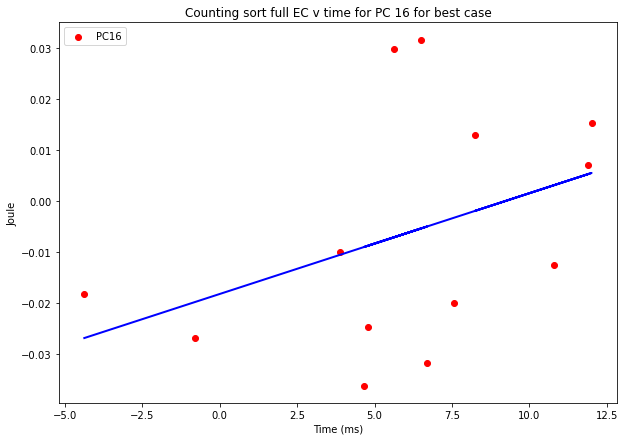

In [45]:
print(polyReg(meanC16[meanC16["Input case"] == "best"]["Time - readCSV"], meanC16[meanC16["Input case"] == "best"]["full EC"], 1,"PC16", "red")[1])
plt.xlabel("Time (ms)")
plt.ylabel("Joule")
plt.title("Counting sort full EC v time for PC 16 for best case")


240.91744130353595 [0.         0.00048286]
644.120218704516 [0.         0.00069965]
worst R2  0.9900250525242253 

best R2  0.9722560706671942 



Text(0, 0.5, 'Time (ms)')

<Figure size 720x504 with 0 Axes>

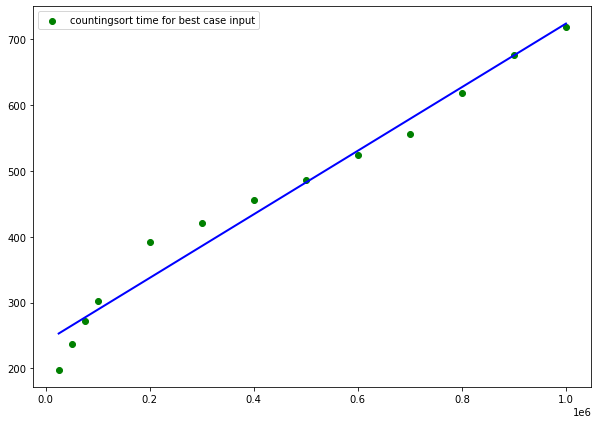

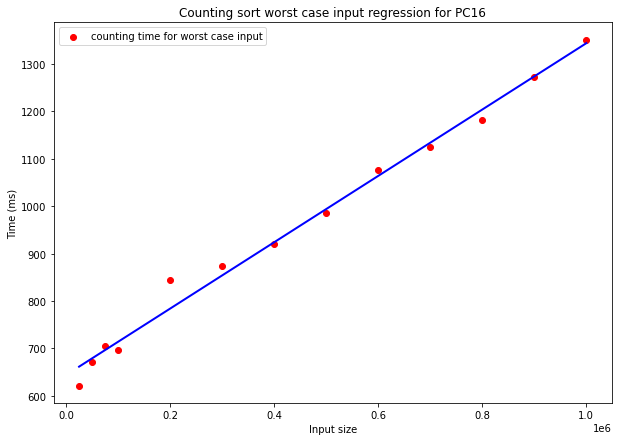

In [46]:
plt.figure(figsize=(10,7))
color = "red"
 #  - readCSV
best = polyReg(meanC16[meanC16["Input case"] == "best"]["Size"], meanC16[meanC16["Input case"] == "best"]["Time (ms)"],1, "countingsort time for best case input", "green")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["Size"], meanC16[meanC16["Input case"] == "worst"]["Time (ms)"],1, "counting time for worst case input", "red")

print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort worst case input regression for PC16")
plt.xlabel("Input size")
plt.ylabel("Time (ms)")

# Time vs big-oh


random1 R2 0.8705583559262297  

random1 R2 0.7384440403414856  

random1 R2 0.7863388843344821  

random1 R2 0.7361002669204388  

random1 R2 0.6973129285890813  

random1 R2 0.7950232442951252  

random1 R2 0.8009169975774627  

random1 R2 0.8272021481453458  

random1 R2 0.6638171560990294  

random1 R2 0.6604379898772414  

worst R2  0.7919785760368997 

best R2  0.6666260545923569 



Text(0, 0.5, 'Time')

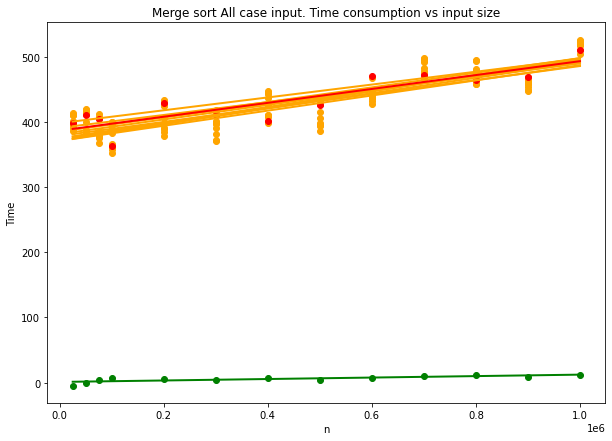

In [59]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []
for i in range(1,11):
    Rs.append(polyReg(meanC16[meanC16["Input case"] == f"random{i}"]["Size"], meanC16[meanC16["Input case"] == f"random{i}"]["Time - readCSV"],1, f"random{i} case input", "orange"))
for i in range(len(Rs)):
    print("random1 R2", Rs[i][1], " \n")

best = polyReg(meanC16[meanC16["Input case"] == "best"]["Size"], meanC16[meanC16["Input case"] == "best"]["Time - readCSV"],1, "Merge time for best case input", "green")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["Size"], meanC16[meanC16["Input case"] == "worst"]["Time - readCSV"],1, "Merge time for worst case input", "red")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Merge sort All case input. Time consumption vs input size")
plt.xlabel("n")
plt.ylabel("Time")


# EC vs Time

random1 R2 0.17812089062078296  

random1 R2 0.1041330892766682  

random1 R2 0.004084481745150859  

random1 R2 0.24635032609373964  

random1 R2 0.00032670465042805574  

random1 R2 0.22968308818219907  

random1 R2 0.19308914403553334  

random1 R2 0.11693800014622302  

random1 R2 0.15196265219078542  

random1 R2 0.029137973715527732  

worst R2  0.16980768632573462 

best R2  0.15982313097042067 



Text(0, 0.5, 'EC (J)')

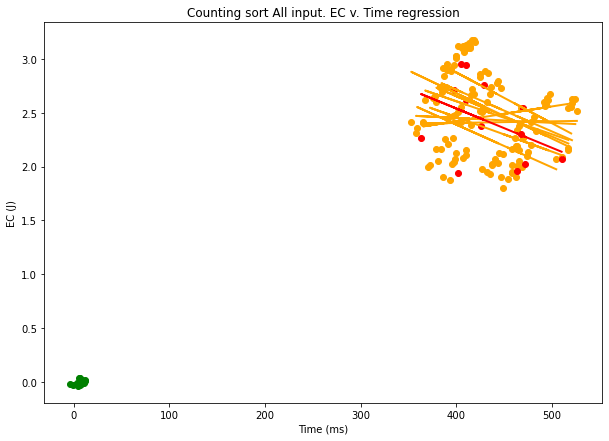

In [58]:
plt.figure(figsize=(10,7))
color = "red"
Rs = []
for i in range(1,11):
    Rs.append(polyReg(meanC16[meanC16["Input case"] == f"random{i}"]["Time - readCSV"], meanC16[meanC16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "orange"))
for i in range(len(Rs)):
    print("random1 R2", Rs[i][1], " \n")
best = polyReg(meanC16[meanC16["Input case"] == "best"]["Time - readCSV"], meanC16[meanC16["Input case"] == "best"]["full EC"],1, "Counting time for best case input", "green")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["Time - readCSV"], meanC16[meanC16["Input case"] == "worst"]["full EC"],1, "counting time for worst case input", "red")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Counting sort All input. EC v. Time regression")
plt.xlabel("Time (ms)")
plt.ylabel("EC (J)")


# EC vs big-oh

random0 R2 0.4328965771956981  

random1 R2 0.5373167460411437  

random2 R2 0.21086586604250424  

random3 R2 0.659715748511629  

random4 R2 0.252831146434244  

random5 R2 0.5803475041097226  

random6 R2 0.5822479077985119  

random7 R2 0.39245547279603543  

random8 R2 0.6903861120861989  

random9 R2 0.17132019375521035  

worst R2  0.5053106910914228 

best R2  0.02439106750969422 



Text(0, 0.5, 'EC (J)')

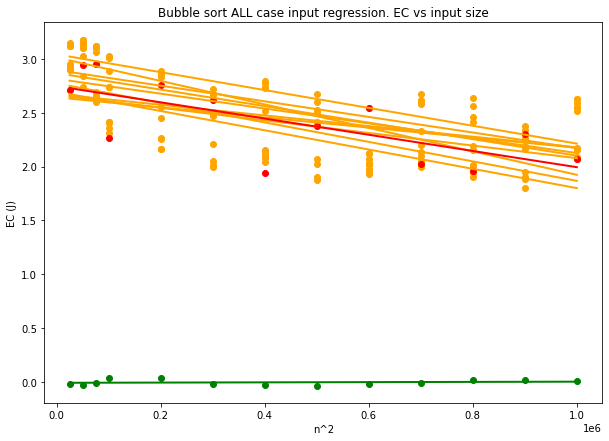

In [60]:
plt.figure(figsize=(10,7))
color = "red"

Rs = []

for i in range(1,11):
    Rs.append(polyReg(meanC16[meanC16["Input case"] == f"random{i}"]["Size"], meanC16[meanC16["Input case"] == f"random{i}"]["full EC"],1, f"random{i} case input", "orange"))
for i in range(len(Rs)):
    print(f"random{i} R2", Rs[i][1], " \n")
best = polyReg(meanC16[meanC16["Input case"] == "best"]["Size"], meanC16[meanC16["Input case"] == "best"]["full EC"],1, "Merge time for best case input", "green")
worst = polyReg(meanC16[meanC16["Input case"] == "worst"]["Size"], meanC16[meanC16["Input case"] == "worst"]["full EC"],1, "Merge time for worst case input", "red")
print(f"worst R2 ", worst[1], "\n")
print(f"best R2 ", best[1], "\n")
plt.title("Bubble sort ALL case input regression. EC vs input size")
plt.xlabel("n^2")
plt.ylabel("EC (J)")
